In [1]:
from glob import glob
import numpy as np
import numpy.random as rd
import pandas as pd
from scipy import stats as st

import IPython.display as ipyd
from matplotlib import animation 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
# %config InlineBackend.figure_format='retina'
sns.set(style="darkgrid", color_codes=True)

In [2]:
def build_gif(imgs, saveto, interval=0.1, dpi=72, save_gif=True, cmap=None):
    imgs = np.asarray(imgs)
    h, w, *c = imgs[0].shape
    fig, ax = plt.subplots(figsize=(np.round(w / dpi), np.round(h / dpi)))
    fig.subplots_adjust(bottom=0)
    fig.subplots_adjust(top=1)
    fig.subplots_adjust(right=1)
    fig.subplots_adjust(left=0)
    ax.set_axis_off()

    if cmap is not None:
        axs = list(map(lambda x: [
            ax.imshow(x, cmap=cmap)], imgs))
    else:
        axs = list(map(lambda x: [
            ax.imshow(x)], imgs))

    ani = animation.ArtistAnimation(
        fig, axs, interval=interval*1000, repeat_delay=0, blit=True)

    if save_gif:
        ani.save(saveto, writer='imagemagick', dpi=dpi)

    return ani

def f(x):
    """マイナス二乗の関数f(x)"""
    return -x**2


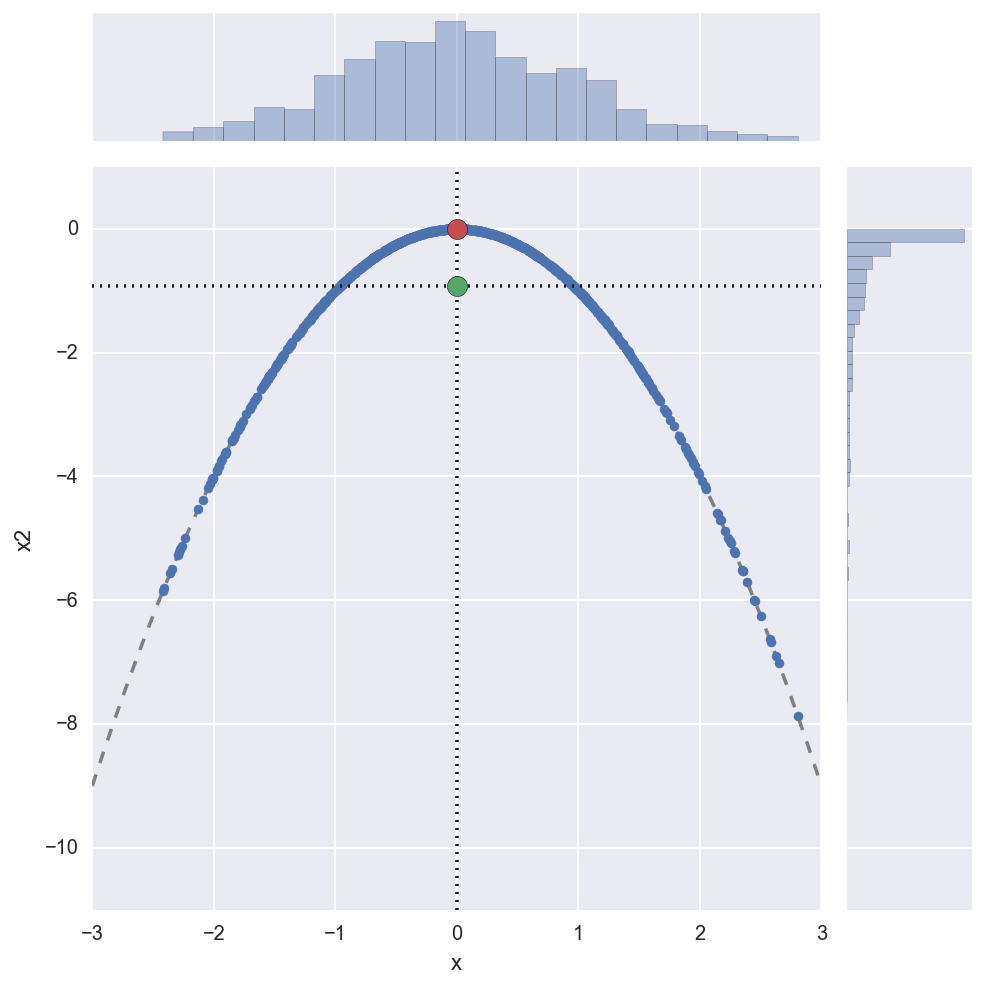

In [3]:
rd.seed(71)
x = rd.normal(0, 1, size=1000)
x2 = f(x)
df = pd.DataFrame(np.c_[x, x2], columns=("x","x2"))
df.dropna(inplace=True)

x_mean = df.x.mean()
x2_mean = df.x2.mean()

xx = np.linspace(-3,3,101)

g = sns.jointplot("x", "x2", data=df, kind="scatter", xlim=(-3, 3), ylim=(-11,1), 
                  color="b", size=7, zorder=50, stat_func=None)
g.ax_joint.plot(xx, f(xx), "--", color="gray")
g.ax_joint.plot([x_mean, x_mean],[-11, 1], ':k', zorder=50)
g.ax_joint.plot([-3, 3],[x2_mean, x2_mean], ':k', zorder=50)

g.ax_joint.scatter(x_mean , f(x_mean), c="r", s=100, zorder=100)
g.ax_joint.scatter(x_mean , np.mean(f(df.x)), c="g", s=100, zorder=100)


In [4]:

rd.seed(71)

n_iter = 30
xx = np.linspace(-3,3,101)
m = np.linspace(-2,2,n_iter)
for i in range(n_iter):
    
    x = rd.normal(m[i],1,size=1000)
    x2 = f(x)
    df = pd.DataFrame(np.c_[x, x2], columns=("x","x2"))

    x_mean = df.x.mean()
    x2_mean = df.x2.mean()

    g = sns.jointplot("x", "x2", data=df, kind="scatter", stat_func=None,
                      xlim=(-3, 3), ylim=(-11,1), color="b", size=7, zorder=50)
    g.ax_joint.plot(xx, f(xx), "--", color="gray")
    g.ax_joint.plot([x_mean, x_mean],[-11, 1], ':k', zorder=50)
    g.ax_joint.plot([-3, 3],[x2_mean, x2_mean], ':k', zorder=50)

    g.ax_joint.scatter(x_mean , f(x_mean), c="r", s=100, zorder=100)
    g.ax_joint.scatter(x_mean , np.mean(f(df.x)), c="g", s=100, zorder=100)
    plt.savefig("./jensen_img/img_{0:03d}".format(i), dpi=128,)
    plt.close()

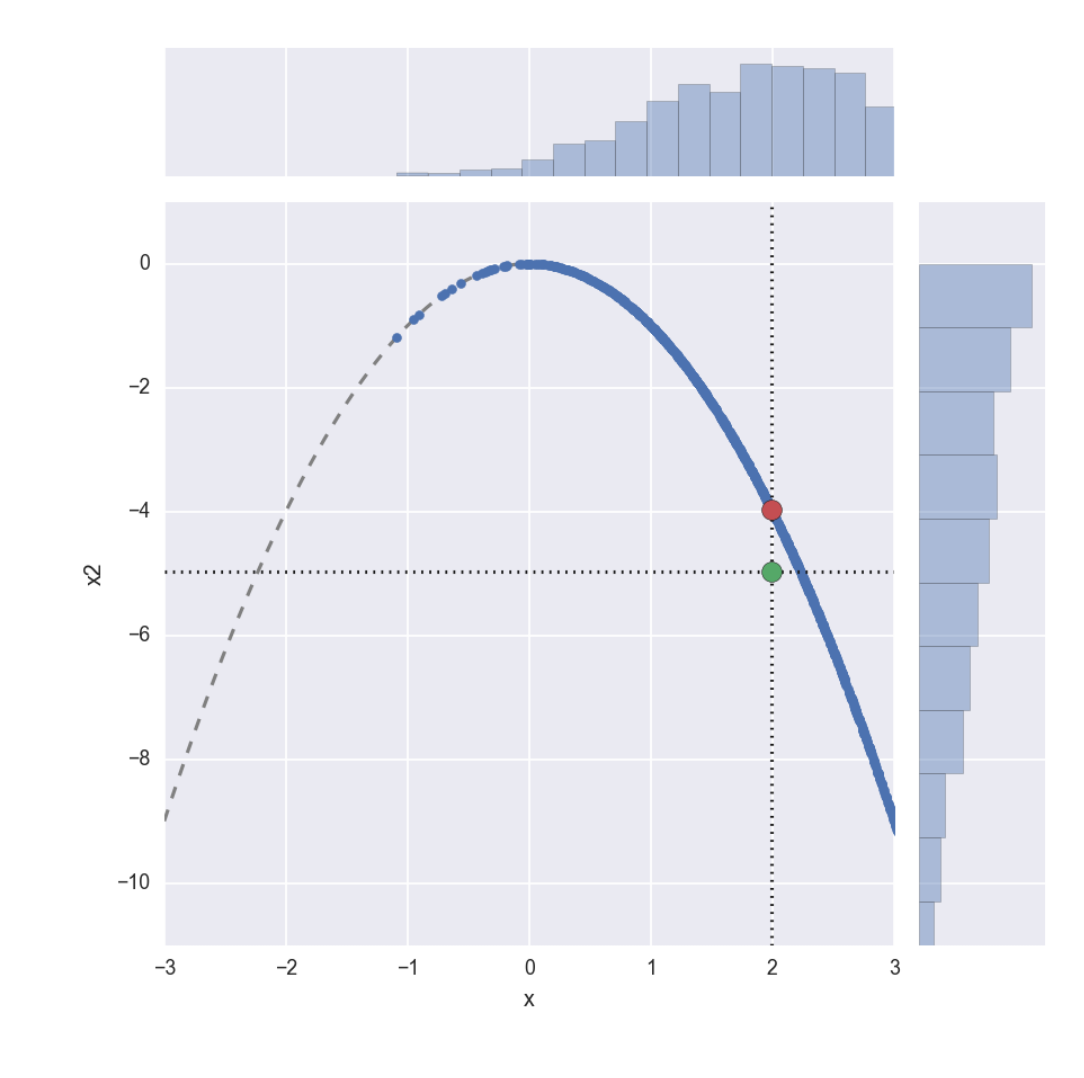

In [5]:
imgs = []
for file_path in glob("./jensen_img/img_*.png"):
    imgs.append(plt.imread(file_path))  
build_gif(imgs, saveto='jensen.gif', interval=0.2, dpi=128)

In [6]:
ipyd.Image(url='jensen.gif?i={}'.format(np.random.rand()), height=500, width=500)

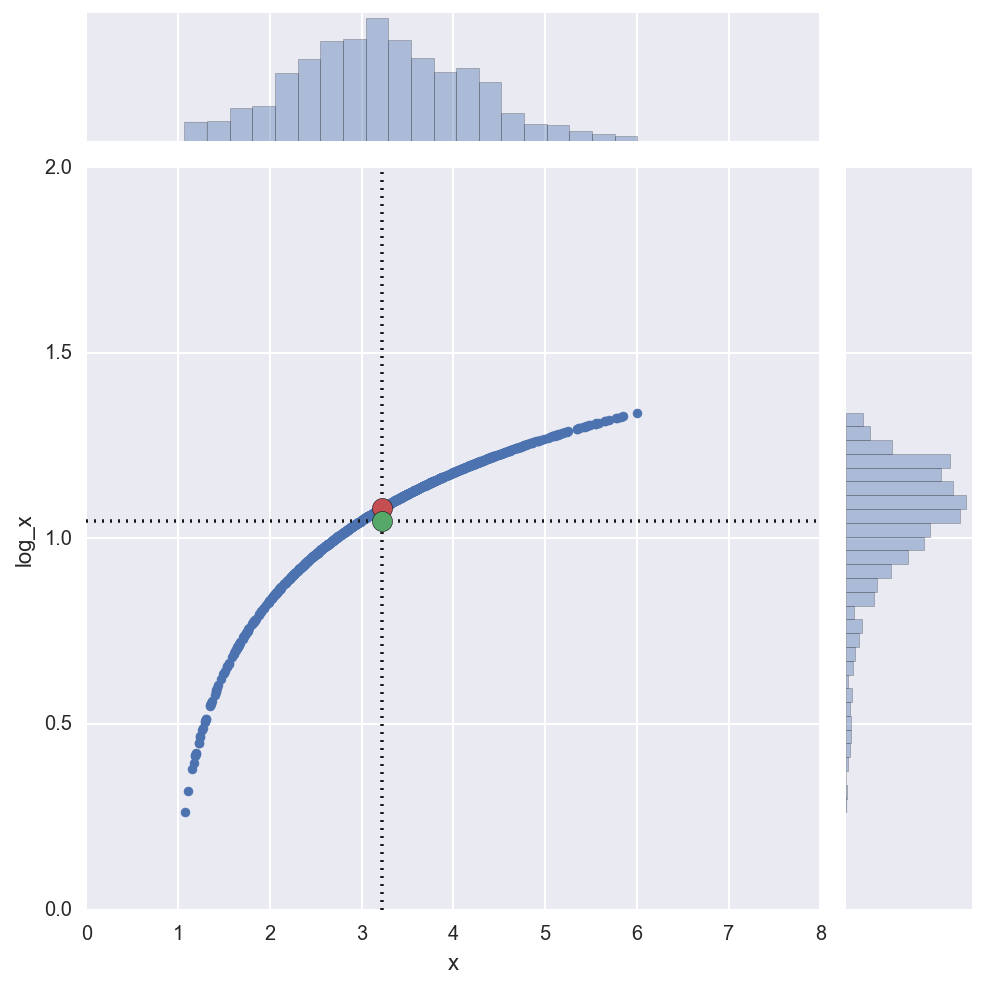

In [9]:
def g(x):
    return np.log(x)**0.5

rd.seed(71)
x = rd.normal(loc= 3.2, size=1000)
log_x = g(x)

df = pd.DataFrame(np.c_[x, log_x], columns=("x","log_x"))
df.dropna(inplace=True)

x_mean = df.x.mean()
log_x_mean = df.log_x.mean()

gr = sns.jointplot("x", "log_x", data=df, kind="scatter", stat_func=None,
                  xlim=(0, 8), ylim=(0,2), color="b", size=7)
gr.ax_joint.plot([x_mean, x_mean],[0, 3], ':k')
gr.ax_joint.plot([0, 8],[log_x_mean, log_x_mean], ':k')

gr.ax_joint.scatter(x_mean , g(x_mean), c="r", s=100, zorder=100)
gr.ax_joint.scatter(x_mean , np.mean(g(df.x)), c="g", s=100, zorder=100)

In [38]:

rd.seed(72)

n_iter = 30
xx = np.linspace(0, 8, 101)
m = np.linspace(3, 6, n_iter)
for i in range(n_iter):
    
    x = rd.normal(m[i], 1 ,size=1000)
    
    log_x = g(x)
    df = pd.DataFrame(np.c_[x, log_x], columns=("x","log_x"))

    x_mean = df.x.mean()
    log_x_mean = df.log_x.mean()

    gr = sns.jointplot("x", "log_x", data=df, kind="scatter", stat_func=None,
                      xlim=(0, 8), ylim=(0,1.5), color="b", size=7, zorder=50)
    gr.ax_joint.plot(xx, g(xx), "--", color="gray")
    gr.ax_joint.plot([x_mean, x_mean],[0, 1.5], ':k', zorder=50)
    gr.ax_joint.plot([0, 8],[log_x_mean, log_x_mean], ':k', zorder=50)
    gr.ax_joint.scatter(x_mean , g(x_mean), c="r", s=100, zorder=100)
    gr.ax_joint.scatter(x_mean , np.mean(g(df.x)), c="g", s=100, zorder=100)
    plt.savefig("./jensen_img/img_log_{0:03d}".format(i), dpi=128,)
    plt.close()

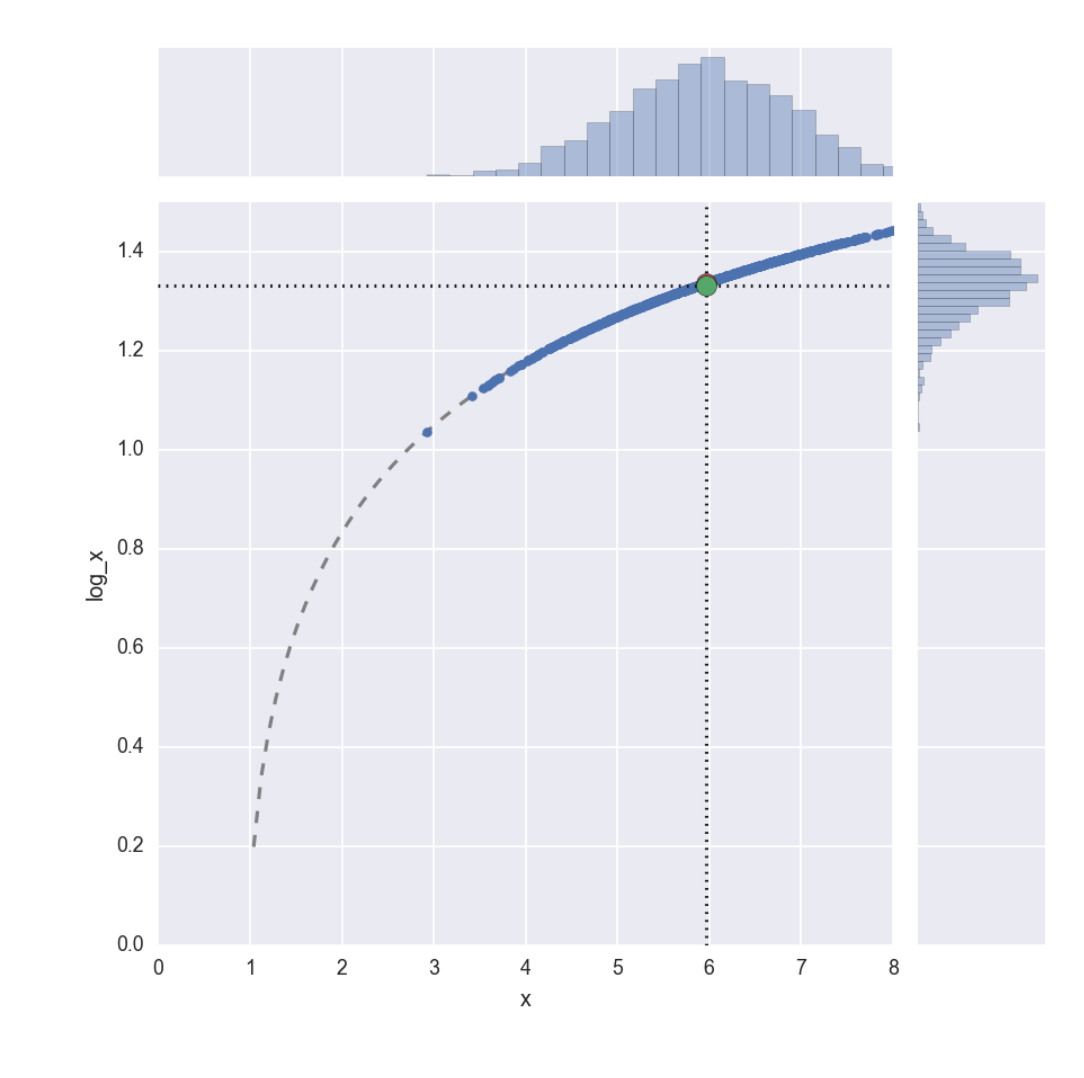

In [39]:
imgs = []
for file_path in glob("./jensen_img/img_log_*.png"):
    imgs.append(plt.imread(file_path))  
build_gif(imgs, saveto='jensen_log.gif', interval=0.2, dpi=128)

In [40]:
ipyd.Image(url='jensen_log.gif?i={}'.format(np.random.rand()), height=500, width=500)